In [2]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.1 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [3]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 11s 0us/step


In [4]:
X_train.shape

(35000, 32, 32, 3)

In [5]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [6]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [ ]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

In [ ]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [ ]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the 
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: 
# Batch-Normalization (BN) is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable.
  It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch.
  This normalization step is applied right before (or right after) the nonlinear function.

# Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change.
  This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities.

# Batch normalization can have a dramatic effect on optimization performance, especially for convolutional networks and networks with sigmoidal nonlinearities.

# Batch Normalization increases our network performances, regarding both the loss and the accuracy.

# Without Batch Normalization, the activated values fluctuate significantly during the first iterations. 
  On the contrary, activation curves are smoother when BN is used.

# Adding BN layers allows us to use higher learning rate (LR) without compromising convergence.

# 



"""
https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338#b93c

In [ ]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

In [33]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
#adding a CNN layer
model.add(tf.keras.layers.Conv2D(32,(5,5),activation ='relu',input_shape=((32, 32, 3))))

#adding a maxpooling layer
model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
model.add(tf.keras.layers.Conv2D(16,(5,5),activation ='relu'))

#adding another maxpooling layer
model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
model.add(tf.keras.layers.Flatten())

#adding a dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

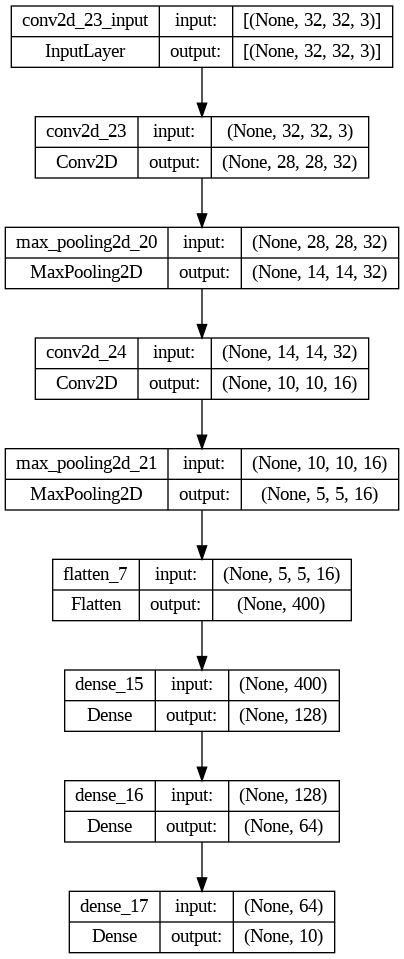

In [35]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

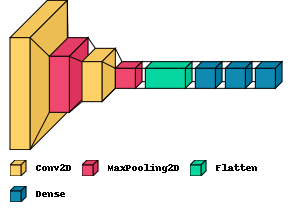

In [36]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [37]:
"""
In the last part of the assignment 
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [38]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 31s 27ms/step - loss: 1.8092 - accuracy: 0.1144 - val_loss: 1.6408 - val_accuracy: 0.0776
Epoch 2/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.5687 - accuracy: 0.0962 - val_loss: 1.5282 - val_accuracy: 0.1277
Epoch 3/10
1094/1094 [==============================] - 26s 23ms/step - loss: 1.4684 - accuracy: 0.0953 - val_loss: 1.4648 - val_accuracy: 0.0610
Epoch 4/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.4106 - accuracy: 0.0969 - val_loss: 1.3667 - val_accuracy: 0.0947
Epoch 5/10
1094/1094 [==============================] - 26s 24ms/step - loss: 1.3764 - accuracy: 0.0967 - val_loss: 1.3089 - val_accuracy: 0.0940
Epoch 6/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.3401 - accuracy: 0.0973 - val_loss: 1.3089 - val_accuracy: 0.0920
Epoch 7/10
1094/1094 [==============================] - 26s 23ms/step - loss: 1.3072 - accuracy: 0.0979 - val_loss: 1.2548 - val_accura

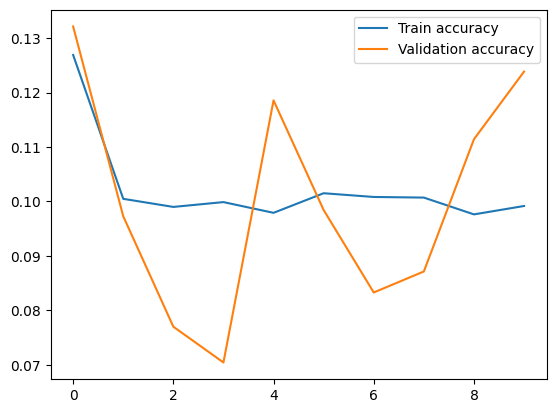

In [12]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [42]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 1.1117 - accuracy: 0.6016


[1.1116806268692017, 0.6015999913215637]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [43]:
#model 2--> changing the kernel size and removing a dense layer
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation ='relu',input_shape=((32, 32, 3))))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [45]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 27s 23ms/step - loss: 1.2217 - accuracy: 0.0986 - val_loss: 1.2049 - val_accuracy: 0.0949
Epoch 2/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.1979 - accuracy: 0.1023 - val_loss: 1.1771 - val_accuracy: 0.0707
Epoch 3/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.2015 - accuracy: 0.0993 - val_loss: 1.2047 - val_accuracy: 0.0914
Epoch 4/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.1744 - accuracy: 0.1014 - val_loss: 1.1386 - val_accuracy: 0.1050
Epoch 5/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.1596 - accuracy: 0.1005 - val_loss: 1.1048 - val_accuracy: 0.0867
Epoch 6/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.1457 - accuracy: 0.1014 - val_loss: 1.1039 - val_accuracy: 0.0840
Epoch 7/10
1094/1094 [==============================] - 26s 23ms/step - loss: 1.1416 - accuracy: 0.1013 - val_loss: 1.0928 -

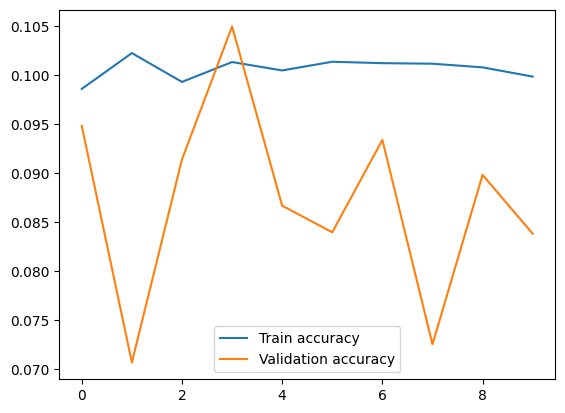

In [48]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [49]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 3ms/step - loss: 1.8831 - accuracy: 0.6413


[1.8831263780593872, 0.6413333415985107]

In [50]:
#model3 --> adding more layers and decreasing learning rate
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(32,(3,3),activation ='relu',input_shape=((32, 32, 3))))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model3.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Conv2D(12,(3,3),activation ='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [51]:
#lr = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [25]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 30s 26ms/step - loss: 0.9995 - accuracy: 0.0972 - val_loss: 0.9938 - val_accuracy: 0.0950
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 0.9839 - accuracy: 0.0980 - val_loss: 0.9785 - val_accuracy: 0.1016
Epoch 3/10
1094/1094 [==============================] - 35s 32ms/step - loss: 0.9866 - accuracy: 0.0996 - val_loss: 0.9871 - val_accuracy: 0.0896
Epoch 4/10
1094/1094 [==============================] - 25s 23ms/step - loss: 0.9853 - accuracy: 0.1005 - val_loss: 0.9775 - val_accuracy: 0.0963
Epoch 5/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.9754 - accuracy: 0.0993 - val_loss: 0.9831 - val_accuracy: 0.0890
Epoch 6/10
1094/1094 [==============================] - 26s 24ms/step - loss: 0.9686 - accuracy: 0.0988 - val_loss: 0.9630 - val_accuracy: 0.1041
Epoch 7/10
1094/1094 [==============================] - 25s 23ms/step - loss: 0.9722 - accuracy: 0.0992 - val_loss: 0.9614 - val_accura

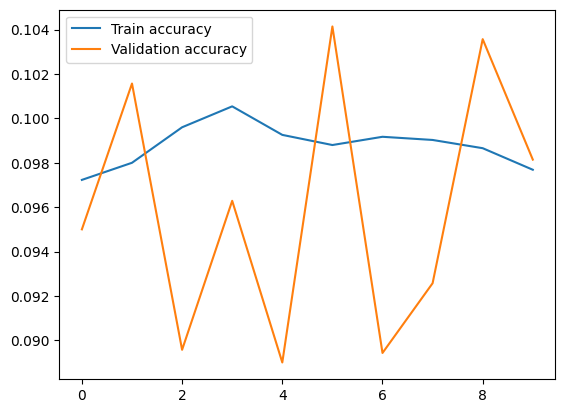

In [26]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [52]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 1.8831 - accuracy: 0.6413


[1.8831263780593872, 0.6413333415985107]

In [39]:
#model4 --> changing the optimizer to SDG
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(32,(3,3),activation ='relu',input_shape=((32, 32, 3))))
model4.add(tf.keras.layers.MaxPooling2D((2,2)))
model4.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model4.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model4.add(tf.keras.layers.MaxPooling2D((2,2)))
model4.add(tf.keras.layers.Conv2D(12,(3,3),activation ='relu'))
model4.add(tf.keras.layers.MaxPooling2D((2,2)))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(64, activation='relu'))
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

In [53]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.9087 - accuracy: 0.0971 - val_loss: 1.8972 - val_accuracy: 0.0907
Epoch 2/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.8989 - accuracy: 0.1022 - val_loss: 1.8824 - val_accuracy: 0.0963
Epoch 3/10
1094/1094 [==============================] - 26s 24ms/step - loss: 1.8906 - accuracy: 0.1037 - val_loss: 1.8797 - val_accuracy: 0.0923
Epoch 4/10
1094/1094 [==============================] - 27s 24ms/step - loss: 1.8857 - accuracy: 0.1035 - val_loss: 1.8716 - val_accuracy: 0.0974
Epoch 5/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.8835 - accuracy: 0.1035 - val_loss: 1.8665 - val_accuracy: 0.0881
Epoch 6/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.8741 - accuracy: 0.1028 - val_loss: 1.8658 - val_accuracy: 0.0953
Epoch 7/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.8756 - accuracy: 0.1027 - val_loss: 1.8614 -

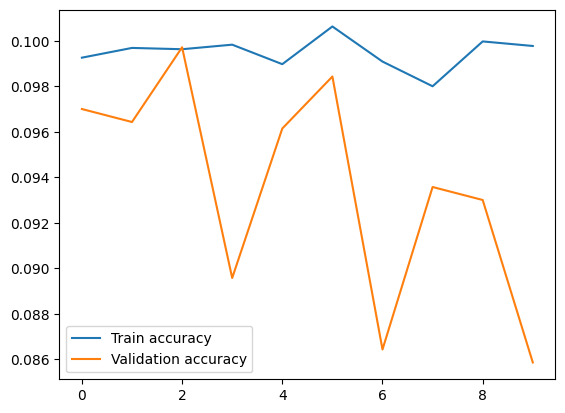

In [30]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [31]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 0.9197 - accuracy: 0.0891


[0.9196771383285522, 0.08906666934490204]

In [46]:
#model5 --> adding dropout
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Conv2D(32,(3,3),activation ='relu',input_shape=((32, 32, 3))))
model5.add(tf.keras.layers.MaxPooling2D((2,2)))
model5.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model5.add(tf.keras.layers.MaxPooling2D((2,2)))
model5.add(tf.keras.layers.Conv2D(16,(3,3),activation ='relu'))
model5.add(tf.keras.layers.Conv2D(12,(3,3),activation ='relu'))
model5.add(tf.keras.layers.MaxPooling2D((2,2)))

model5.add(tf.keras.layers.Flatten())

model5.add(tf.keras.layers.Dense(128, activation='relu'))
model5.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model5.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

In [ ]:
model.evaluate(X_test,Y_test)